In [12]:
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd

image = ["test_0_man.jpg", "test_0_man.jpg","test_0_man.jpg"]
clothes = ["00071_00.jpg", "04700_00.jpg", "02007_00.jpg"]
df = pd.DataFrame({"image": image, "clothes": clothes})
df.to_csv("data/pairs1.txt", index=False, header=False, sep=" ")

In [10]:
!python test_generator.py --occlusion --cuda {True} --gpu_ids {0} --dataroot data/ --data_list pairs1.txt --output_dir output/

Namespace(batch_size=1, checkpoint_dir='checkpoints', clothmask_composition='warp_grad', cuda='True', data_list='pairs1.txt', datamode='test', dataroot='data/', datasetting='unpaired', fine_height=1024, fine_width=768, fp16=False, gen_checkpoint='./eval_models/weights/v0.1/gen.pth', gen_semantic_nc=7, gpu_ids='0', init_type='xavier', init_variance=0.02, ngf=64, norm_G='spectralaliasinstance', num_upsampling_layers='most', occlusion=True, out_layer='relu', output_dir='output/', output_nc=13, semantic_nc=13, shuffle=False, tensorboard_count=100, tensorboard_dir='./data/zalando-hd-resize/tensorboard', test_name='test', tocg_checkpoint='./eval_models/weights/v0.1/mtviton.pth', upsample='bilinear', warp_feature='T1', workers=4)
Start to test %s!
Network [SPADEGenerator] was created. Total number of parameters: 100.5 million. To see the architecture, do print(network).
1
2
3
Test time 9.219349145889282
Finished testing!


C:\Try_On\HR-VITON\HR-VITON\networks.py:423: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  log = model.load_state_dict(torch.load(checkpoint_path), strict=False)
test_genera

Processing images: 100%|██████████| 3/3 [00:00<00:00, 13.62it/s]


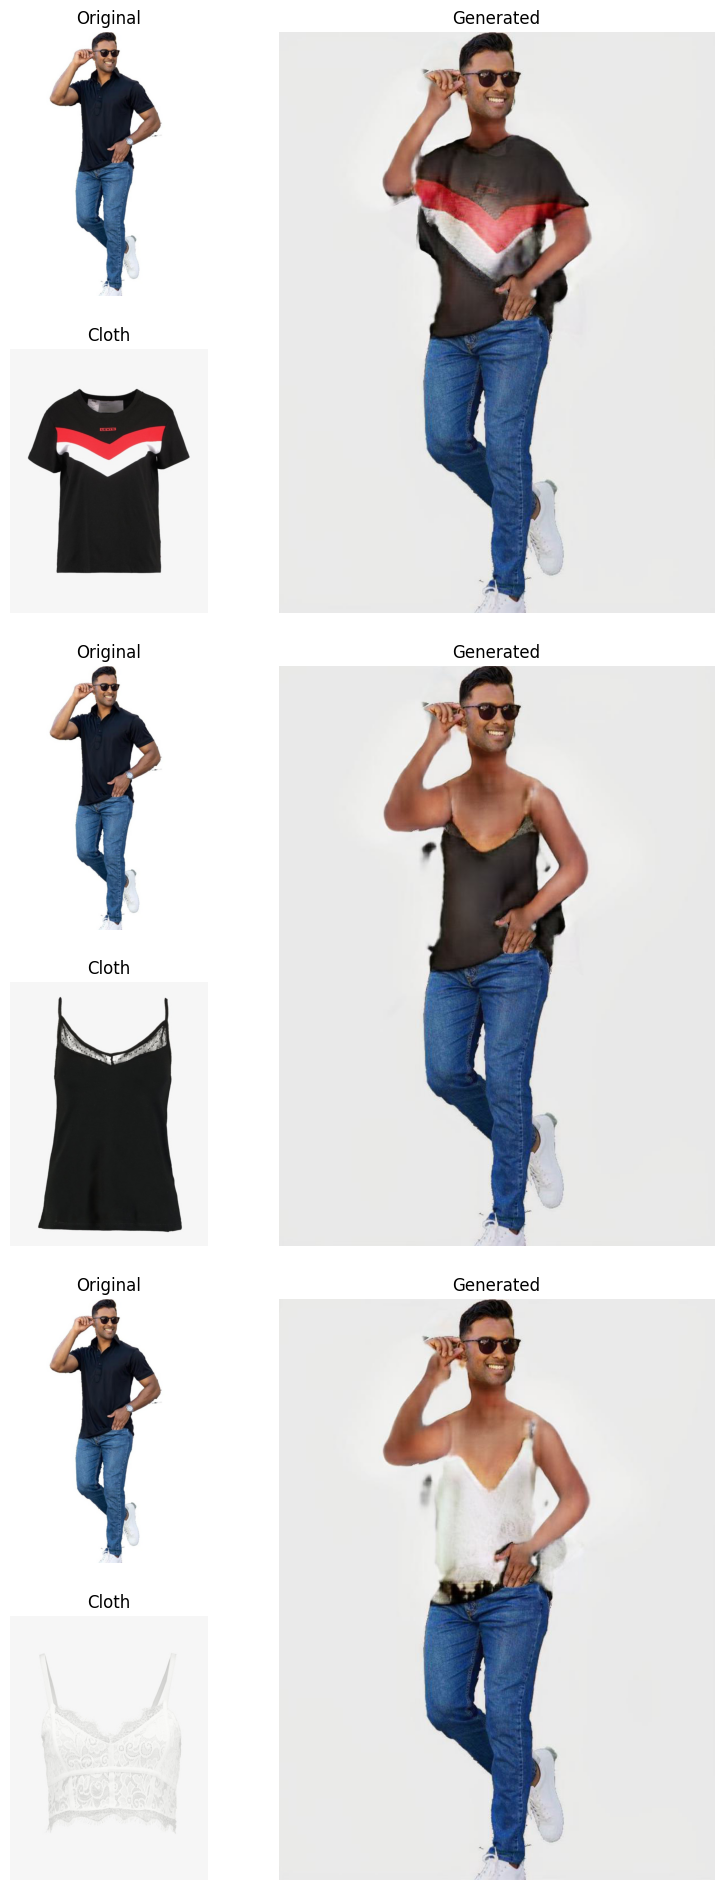

In [13]:
plt.figure(figsize=(10, 8 * len(image)))
grid = plt.GridSpec(2 * len(image), 3, wspace=0, hspace=0.2)

for idx in tqdm(range(len(image)), total=len(image), desc="Processing images"):
    img_ori = plt.imread(f"data/test/image/{image[idx]}")
    cloth = plt.imread(f"data/test/cloth/{clothes[idx]}")
    img_new = plt.imread(f"output/{image[idx][:-4]}_{clothes[idx][:-4]}.png", 0)

    plt.subplot(grid[2*idx, 0])
    plt.imshow(img_ori)
    plt.axis("off")
    plt.title("Original")

    plt.subplot(grid[2*idx + 1, 0])
    plt.imshow(cloth)
    plt.axis("off")
    plt.title("Cloth")

    plt.subplot(grid[2*idx:2*idx+2, 1:])
    plt.imshow(img_new)
    plt.axis("off")
    plt.title("Generated")

In [13]:
import json
import numpy as np
path = r'data\test\openpose_json\00006_00_keypoints.json'
with open(path, 'r') as f:
    pose_label = json.load(f)
    pose_data = pose_label['people'][0]['pose_keypoints_2d']
    pose_data = np.array(pose_data)

In [14]:
len(pose_data)

75

In [15]:
pose_data = pose_data.reshape((-1, 3))

In [16]:
pose_data

array([[3.71684e+02, 1.67704e+02, 9.33216e-01],
       [3.74624e+02, 3.32151e+02, 8.01548e-01],
       [2.55479e+02, 3.06573e+02, 7.06157e-01],
       [1.70561e+02, 5.78504e+02, 7.83719e-01],
       [2.01665e+02, 8.56322e+02, 7.07795e-01],
       [5.04816e+02, 3.68800e+02, 7.51704e-01],
       [4.87844e+02, 5.47420e+02, 3.85496e-01],
       [4.93633e+02, 6.52287e+02, 9.51390e-02],
       [3.71680e+02, 7.54280e+02, 4.23855e-01],
       [2.81026e+02, 7.57128e+02, 3.84075e-01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00],
       [4.62298e+02, 7.54277e+02, 3.91744e-01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00],
       [3.29366e+02, 1.44999e+02, 9.42529e-01],
       [3.97153e+02, 1.25323e+02, 8.85736e-01],
       [3.03747e+02, 1.70585e+02, 8.80493e-01],
       [4.45421e+02, 1.44999e+02, 7.85291e-01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.0000

In [2]:
import os

In [3]:
os.path.exists(path)

False

In [2]:
import argparse

def get_opt():
    parser = argparse.ArgumentParser()

    parser.add_argument("--gpu_ids", default="")
    parser.add_argument('-j', '--workers', type=int, default=4)
    parser.add_argument('-b', '--batch-size', type=int, default=1)
    parser.add_argument('--fp16', action='store_true', help='use amp')
    # Cuda availability
    parser.add_argument('--cuda',default=False, help='cuda or cpu')

    parser.add_argument('--test_name', type=str, default='test', help='test name')
    parser.add_argument("--dataroot", default="./data/zalando-hd-resize")
    parser.add_argument("--datamode", default="test")
    parser.add_argument("--data_list", default="test_pairs.txt")
    parser.add_argument("--output_dir", type=str, default="./Output")
    parser.add_argument("--datasetting", default="unpaired")
    parser.add_argument("--fine_width", type=int, default=768)
    parser.add_argument("--fine_height", type=int, default=1024)

    parser.add_argument('--tensorboard_dir', type=str, default='./data/zalando-hd-resize/tensorboard', help='save tensorboard infos')
    parser.add_argument('--checkpoint_dir', type=str, default='checkpoints', help='save checkpoint infos')
    parser.add_argument('--tocg_checkpoint', type=str, default='./eval_models/weights/v0.1/mtviton.pth', help='tocg checkpoint')
    parser.add_argument('--gen_checkpoint', type=str, default='./eval_models/weights/v0.1/gen.pth', help='G checkpoint')

    parser.add_argument("--tensorboard_count", type=int, default=100)
    parser.add_argument("--shuffle", action='store_true', help='shuffle input data')
    parser.add_argument("--semantic_nc", type=int, default=13)
    parser.add_argument("--output_nc", type=int, default=13)
    parser.add_argument('--gen_semantic_nc', type=int, default=7, help='# of input label classes without unknown class')
    
    # network
    parser.add_argument("--warp_feature", choices=['encoder', 'T1'], default="T1")
    parser.add_argument("--out_layer", choices=['relu', 'conv'], default="relu")
    
    # training
    parser.add_argument("--clothmask_composition", type=str, choices=['no_composition', 'detach', 'warp_grad'], default='warp_grad')
        
    # Hyper-parameters
    parser.add_argument('--upsample', type=str, default='bilinear', choices=['nearest', 'bilinear'])
    parser.add_argument('--occlusion', action='store_true', help="Occlusion handling")

    # generator
    parser.add_argument('--norm_G', type=str, default='spectralaliasinstance', help='instance normalization or batch normalization')
    parser.add_argument('--ngf', type=int, default=64, help='# of gen filters in first conv layer')
    parser.add_argument('--init_type', type=str, default='xavier', help='network initialization [normal|xavier|kaiming|orthogonal]')
    parser.add_argument('--init_variance', type=float, default=0.02, help='variance of the initialization distribution')
    parser.add_argument('--num_upsampling_layers', choices=('normal', 'more', 'most'), default='most', # normal: 256, more: 512
                        help="If 'more', adds upsampling layer between the two middle resnet blocks. If 'most', also add one more upsampling + resnet layer at the end of the generator")

    opt = parser.parse_args(args=[])
    return opt

19
19 19 tensor(-1.) tensor(19)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


test_0_man.jpg


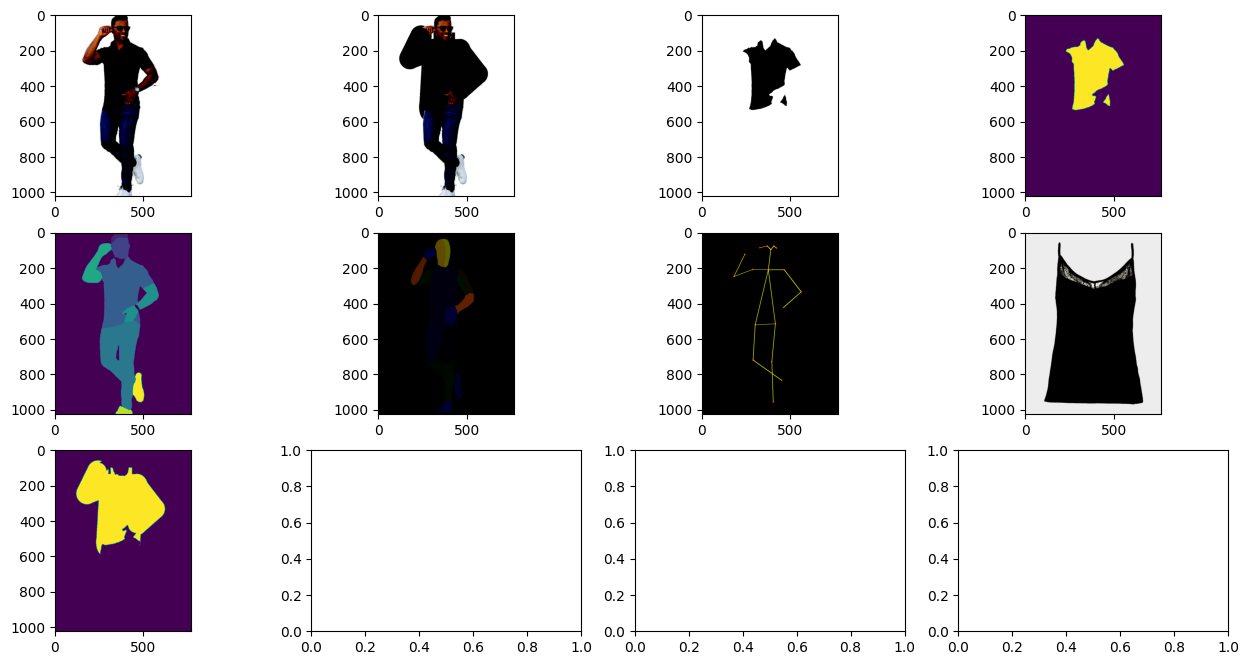

In [ ]:
from cp_dataset_test import CPDatasetTest, CPDataLoader
import matplotlib.pyplot as plt

def main():
    opt = get_opt()
    opt.occlusion = True
    opt.cuda = True
    opt.gpu_ids = "0"
    opt.dataroot = "data/"
    opt.data_list = "pairs1.txt"
    opt.output_dir = "output/"

    # create test dataset & loader
    test_dataset = CPDatasetTest(opt)
    # test_loader = CPDataLoader(opt, test_dataset)
    
    sample = test_dataset[1]

    fig, ax = plt.subplots(3, 4, figsize=(16,8))
    
    ax[0,0].imshow(sample['image'].permute(1,2,0))
    ax[0,1].imshow(sample['agnostic'].permute(1,2,0))
    ax[0,2].imshow(sample['parse_cloth'].permute(1,2,0))
    ax[0,3].imshow(sample['pcm'].permute(1,2,0))
    ax[1,0].imshow(sample['parse_onehot'].permute(1,2,0))
    ax[1,1].imshow(sample['densepose'].permute(1,2,0))
    ax[1,2].imshow(sample['pose'].permute(1,2,0))
    ax[1,3].imshow(sample['cloth']['unpaired'].permute(1,2,0))
    ax[2,0].imshow(sample['parse_agnostic_onehot'].permute(1,2,0))
    ax[2,1].imshow(sample['agnostic_mask'])
    
    return sample



# if __name__ == "__main__":
sample = main()
print(sample['im_name'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


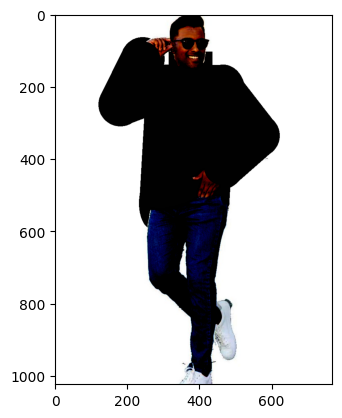

In [8]:
# plt.imshow(sample['agnostic_mask'])
plt.imshow(sample['agnostic'].permute(1,2,0))
plt.savefig('out')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


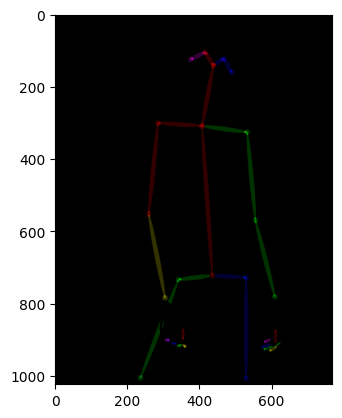

In [29]:
plt.imshow(sample['pose'].permute(1,2,0))

In [33]:
keypoints = sample['pose_data']

In [8]:
from PIL import Image
import numpy as np

image = Image.open(r'data\test\image-parse-v3\14572_00.png')
image.size

(768, 1024)

In [16]:
image.mode
palette =image.getpalette()
# colormap.reshape((3, -1))
palette_dict = {
    i: tuple(palette[i*3:(i+1)*3])
    for i in range(256)
}
palette_dict


{0: (0, 0, 0),
 1: (128, 0, 0),
 2: (254, 0, 0),
 3: (0, 85, 0),
 4: (169, 0, 51),
 5: (254, 85, 0),
 6: (0, 0, 85),
 7: (0, 119, 220),
 8: (85, 85, 0),
 9: (0, 85, 85),
 10: (85, 51, 0),
 11: (52, 86, 128),
 12: (0, 128, 0),
 13: (0, 0, 254),
 14: (51, 169, 220),
 15: (0, 254, 254),
 16: (85, 254, 169),
 17: (169, 254, 85),
 18: (254, 254, 0),
 19: (254, 169, 0),
 20: (20, 20, 20),
 21: (21, 21, 21),
 22: (22, 22, 22),
 23: (23, 23, 23),
 24: (24, 24, 24),
 25: (25, 25, 25),
 26: (26, 26, 26),
 27: (27, 27, 27),
 28: (28, 28, 28),
 29: (29, 29, 29),
 30: (30, 30, 30),
 31: (31, 31, 31),
 32: (32, 32, 32),
 33: (33, 33, 33),
 34: (34, 34, 34),
 35: (35, 35, 35),
 36: (36, 36, 36),
 37: (37, 37, 37),
 38: (38, 38, 38),
 39: (39, 39, 39),
 40: (40, 40, 40),
 41: (41, 41, 41),
 42: (42, 42, 42),
 43: (43, 43, 43),
 44: (44, 44, 44),
 45: (45, 45, 45),
 46: (46, 46, 46),
 47: (47, 47, 47),
 48: (48, 48, 48),
 49: (49, 49, 49),
 50: (50, 50, 50),
 51: (51, 51, 51),
 52: (52, 52, 52),
 53: (

In [18]:
connections = [
    # Head / Face
    (0, 15),   # Nose → R-Eye
    (0, 16),   # Nose → L-Eye
    (15, 17),  # R-Eye → R-Ear
    (16, 18),  # L-Eye → L-Ear

    # Upper Body
    (0, 1),    # Nose → Neck
    (1, 5),    # Neck → L-Shoulder
    (1, 2),    # Neck → R-Shoulder

    # Left Arm
    (5, 6),    # L-Shoulder → L-Elbow
    (6, 7),    # L-Elbow → L-Wrist

    # Right Arm
    (2, 3),    # R-Shoulder → R-Elbow
    (3, 4),    # R-Elbow → R-Wrist

    # Torso / Hips
    (1, 8),    # Neck → Mid-Hip
    (8, 12),   # Mid-Hip → L-Hip
    (8, 9),    # Mid-Hip → R-Hip

    # Left Leg
    (12, 13),  # L-Hip → L-Knee
    (13, 14),  # L-Knee → L-Ankle

    # Right Leg
    (9, 10),   # R-Hip → R-Knee
    (10, 11),  # R-Knee → R-Ankle

    # Left Foot
    (14, 19),  # L-Ankle → L-BigToe
    (14, 20),  # L-Ankle → L-SmallToe
    (14, 21),  # L-Ankle → L-Heel

    # Right Foot
    (11, 22),  # R-Ankle → R-BigToe
    (11, 23),  # R-Ankle → R-SmallToe
    (11, 24),  # R-Ankle → R-Heel
]


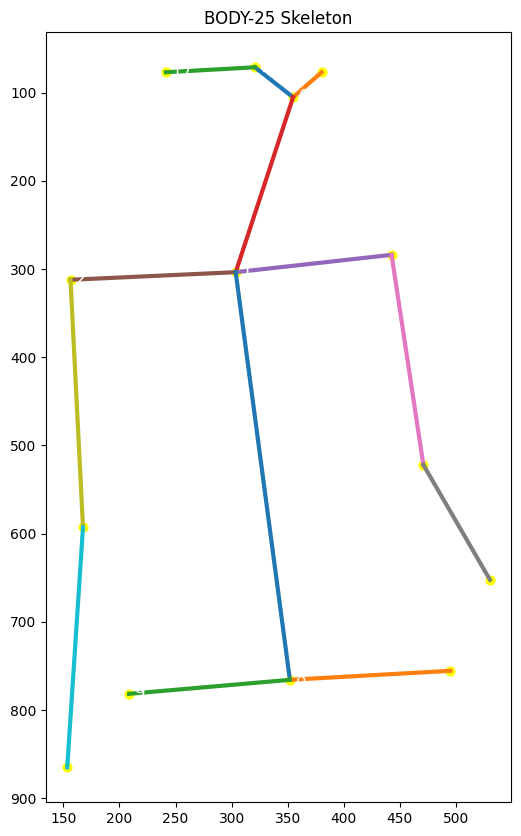

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Your keypoints
keypoints = sample['pose_data']

# BODY-25 connections
# connections = [
#     (0,15), (0,16), (15,17), (16,18),
#     (0,1), (1,5), (1,2),
#     (5,6), (6,7),
#     (2,3), (3,4),
#     (1,8), (8,12), (8,9),
#     (12,13), (13,14),
#     (9,10), (10,11),
#     (14,19), (14,20), (14,21),
#     (11,22), (11,23), (11,24),
# ]

def plot_skeleton(connections, title="Skeleton"):
    plt.figure(figsize=(6,10))
    plt.gca().invert_yaxis()

    # plot keypoints with index labels
    for i,(x,y) in enumerate(keypoints):
        if x>0 and y>0:
            plt.scatter(x, y, color="yellow", s=40)
            plt.text(x+5, y+5, str(i), color="white", fontsize=12)

    # plot limbs
    for (i,j) in connections:
        if np.all(keypoints[i]>0) and np.all(keypoints[j]>0):
            xs = [keypoints[i,0], keypoints[j,0]]
            ys = [keypoints[i,1], keypoints[j,1]]
            plt.plot(xs, ys, linewidth=3)

    plt.title(title)
    plt.show()

plot_skeleton(connections, "BODY-25 Skeleton")


In [25]:
sample['im_name']

'00782_00.jpg'